In [1]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Download the price of gold and resample to monthly values
df = yf.download('GC=F', start = '2000-01-01',
                end='2020-01-01',
                progress=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.rename(columns = {'Close': 'price'}, inplace = True)

In [4]:
df = df.resample('M').last()

In [5]:
df = df[['price']]

In [6]:
# Add the rolling mean and standard deviation

window_size = 12
df['rolling_mean'] = df.price.rolling(window= window_size).mean()

df['rolling_std'] = df.price.rolling(window=window_size).std()

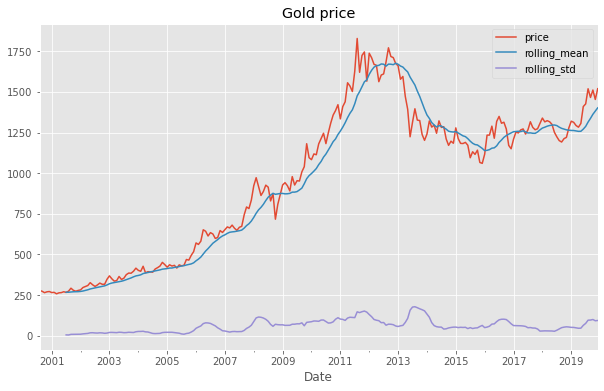

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10, 6))
df.plot(title = 'Gold price', ax = ax)
plt.show()


we can observe that price follows a non-linear growth pattern. therefore we will use a multiplicative model


In [8]:
# carry out seasonal decomposition using multiplicative model
decomposition_results = seasonal_decompose(df.price, model='multiplicative')

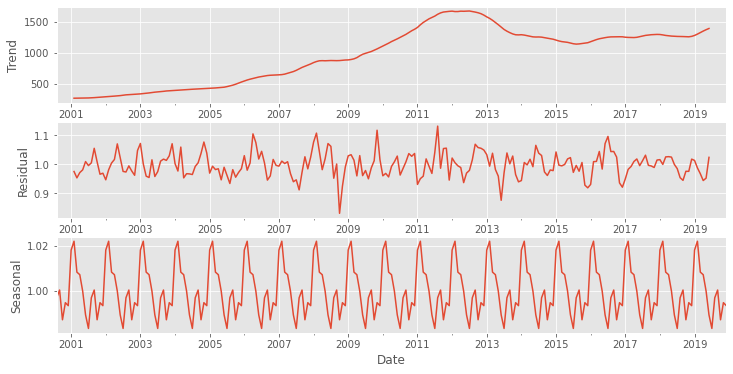

In [9]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,6))
decomposition_results.trend.plot(ax=ax1)
ax1.set(ylabel = 'Trend')

decomposition_results.resid.plot(ax=ax2)
ax2.set(ylabel = 'Residual')

decomposition_results.seasonal.plot(ax=ax3)
ax3.set(ylabel = 'Seasonal')

plt.show()